# Optimisation pour le Machine Learning — Master SSD


### Étape 0 — Préparation de l’environnement

#### Étape 0.1 — Imports et seed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(42)


####  Étape 0.2 — Fonctions utilitaires

In [2]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


## Étape 1 — Exercice 1 : Modélisation et étude théorique

### Étape 1.1 — Chargement des données 

In [ ]:
data_path = "YearPredictionmsd/YearPredictionMSD.txt"  # adapter si besoin
data = pd.read_csv(data_path, header=None)

print("Shape :", data.shape)
data.head()


Shape : (515345, 91)


,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


### Étape 1.1.2 — Séparation X / y

In [4]:
y = data.iloc[:, 0].values
X = data.iloc[:, 1:].values

print("X :", X.shape)
print("y :", y.shape)


X : (515345, 90)
y : (515345,)


### Étape 1.1.3 — Train / Test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Étape 1.1.4 — Standardisation

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Étape 1.2 — Modélisation (fonction objectif)

In [7]:
def objective(w, X, y, mu):
    n = X.shape[0]
    return (1/n) * np.sum((X @ w - y)**2) + (mu/2) * np.linalg.norm(w)**2


### Étape 1.3 — Gradient et Hessienne

### Étape 1.3.1 — Gradient analytique

In [8]:
def gradient(w, X, y, mu):
    n = X.shape[0]
    return (2/n) * X.T @ (X @ w - y) + mu * w


### Étape 1.3.2 — Hessienne

In [9]:
def hessian(X, mu):
    n, d = X.shape
    return (2/n) * (X.T @ X) + mu * np.eye(d)


## Étape 2 — Exercice 2 : Stochasticité et passage à l’échelle

### Étape 2.1 — Gradient Descent (Batch)

In [10]:
def gradient_descent(X, y, mu, alpha, n_iter):
    n, d = X.shape
    w = np.zeros(d)
    history = []

    for k in range(n_iter):
        grad = gradient(w, X, y, mu)
        w -= alpha * grad
        history.append(objective(w, X, y, mu))

    return w, history


### Étape 2.2 — SGD (from scratch)

In [11]:
def sgd(X, y, mu, alpha, n_iter):
    n, d = X.shape
    w = np.zeros(d)
    history = []

    for k in range(n_iter):
        i = np.random.randint(n)
        xi = X[i]
        yi = y[i]
        grad_i = 2 * xi * (xi @ w - yi) + mu * w
        w -= alpha * grad_i

        if k % 1000 == 0:
            history.append(objective(w, X, y, mu))

    return w, history


### Étape 2.3 — Comparaison Batch vs SGD

In [12]:
mu = 1e-3
alpha = 1e-2

X_small = X_train[:20000]
y_small = y_train[:20000]

w_gd, hist_gd = gradient_descent(X_small, y_small, mu, alpha, 100)
w_sgd, hist_sgd = sgd(X_train, y_train, mu, alpha, 50000)


C:\Users\Mohame Lemine\AppData\Local\Temp\ipykernel_16508\875737683.py:3: RuntimeWarning: overflow encountered in square
  return (1/n) * np.sum((X @ w - y)**2) + (mu/2) * np.linalg.norm(w)**2
c:\Users\Mohame Lemine\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Mohame Lemine\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\linalg\_linalg.py:2792: RuntimeWarning: overflow encountered in dot
  sqnorm = x.dot(x)
C:\Users\Mohame Lemine\AppData\Local\Temp\ipykernel_16508\1625785520.py:10: RuntimeWarning: overflow encountered in multiply
  grad_i = 2 * xi * (xi @ w - yi) + mu * w
C:\Users\Mohame Lemine\AppData\Local\Temp\ipykernel_16508\1625785520.py:11: RuntimeWarning: invalid value encountered in subtract
  w -= alpha * grad_i
C:\Users\Mohame Lemine\AppData\Local\Temp\ipykernel_16508\1625785520.py:10: RuntimeWarning: in

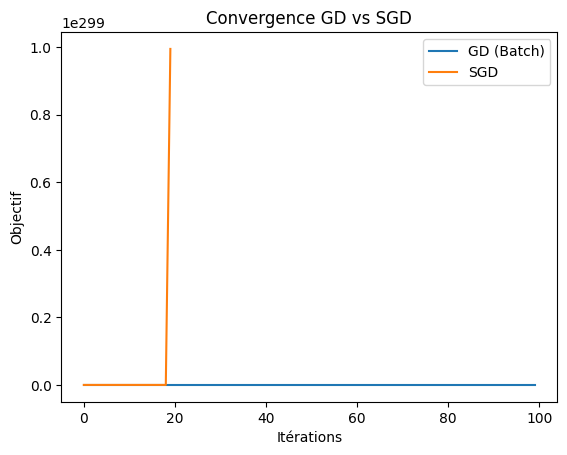

In [13]:
plt.plot(hist_gd, label="GD (Batch)")
plt.plot(hist_sgd, label="SGD")
plt.legend()
plt.title("Convergence GD vs SGD")
plt.xlabel("Itérations")
plt.ylabel("Objectif")
plt.show()


###  Comportement de la fonction objectif

La figure montre l’évolution de la fonction objectif en fonction du nombre d’itérations
pour GD et SGD.

On observe que :
- La descente de gradient batch (GD) présente une convergence stable.
- La méthode SGD diverge rapidement et atteint des valeurs extrêmement élevées
(de l’ordre de 10^299).


### Étape 2.4 — Mini-batch

In [ ]:
def sgd(X, y, mu, alpha, n_iter):
    n, d = X.shape
    w = np.zeros(d)
    history = []

    for k in range(n_iter):
        i = np.random.randint(n)
        xi = X[i]
        yi = y[i]
        grad_i = 2 * xi * (xi @ w - yi) + mu * w
        w -= alpha * grad_i

        if k % 1000 == 0:
            history.append(objective(w, X, y, mu))

    return w, history


### Étape 2.5 — Adam (implémentation manuelle)

In [19]:
def adam(X, y, mu, alpha, n_iter, beta1=0.9, beta2=0.999, eps=1e-8):
    n, d = X.shape
    w = np.zeros(d)
    m = np.zeros(d)
    v = np.zeros(d)
    history = []

    for k in range(1, n_iter+1):
        i = np.random.randint(n)
        xi = X[i]
        yi = y[i]
        g = 2 * xi * (xi @ w - yi) + mu * w

        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * (g ** 2)

        m_hat = m / (1 - beta1**k)
        v_hat = v / (1 - beta2**k)

        w -= alpha * m_hat / (np.sqrt(v_hat) + eps)

        if k % 1000 == 0:
            history.append(objective(w, X, y, mu))

    return w, history


In [20]:
# Étape 2.4.2 — Exécution du mini-batch SGD

batch_size = 128
alpha_mb = 1e-3

w_mb, hist_mb = mini_batch_sgd(
    X_train, y_train,
    mu=1e-3,
    alpha=alpha_mb,
    batch_size=batch_size,
    n_iter=20000
)


KeyboardInterrupt: 

## Étape 3 — Exercice 3 : Parcimonie et algorithmes proximaux

### Étape 3.1 — Proximal L1 (Soft-thresholding)

In [16]:
def soft_thresholding(w, lam):
    return np.sign(w) * np.maximum(np.abs(w) - lam, 0)


### Étape 3.2 — ISTA

In [17]:
def ista(X, y, lam, alpha, n_iter):
    n, d = X.shape
    w = np.zeros(d)
    history = []

    for k in range(n_iter):
        grad = (2/n) * X.T @ (X @ w - y)
        w = soft_thresholding(w - alpha * grad, lam * alpha)
        history.append(mse(y, X @ w))

    return w, history


### Étape 3.3 — FISTA

In [18]:
def fista(X, y, lam, alpha, n_iter):
    n, d = X.shape
    w = np.zeros(d)
    z = w.copy()
    t = 1
    history = []

    for k in range(n_iter):
        grad = (2/n) * X.T @ (X @ z - y)
        w_new = soft_thresholding(z - alpha * grad, lam * alpha)
        t_new = (1 + np.sqrt(1 + 4 * t**2)) / 2
        z = w_new + ((t - 1) / t_new) * (w_new - w)
        w, t = w_new, t_new
        history.append(mse(y, X @ w))

    return w, history
